In [106]:
#Data organization and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#ML
import sklearn.linear_model as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [165]:
#Loading data
fileName = "diamonds.csv"
df = pd.read_csv(fileName)
df = df.drop("Unnamed: 0", axis=1)

#Check for missing values
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [166]:
#Visualize data
display(df)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [167]:
#Preprocessing
#Replacing String values with numbers

#Increasing order for Cut
#Fair, Good, Very Good, Premium, Ideal
cuts = {'Fair'      : 0, 
        'Good'      : 1, 
        'Very Good' : 2, 
        'Premium'   : 3,
        'Ideal'     : 4}
for c in cuts.keys():
    df['cut'] = df['cut'].replace(c, cuts[c])

    
#Increasing order for Clarity
#I1 , SI2, SI1, VS2, VS1, VVS2, VVS1, IF
clarity = {'I1'   : 0,
           'SI2'  : 1,
           'SI1'  : 2,
           'VS2'  : 3,
           'VS1'  : 4,
           'VVS2' : 5,
           'VVS1' : 6,
           'IF'   : 7}

for c in clarity.keys():
    df['clarity'] = df['clarity'].replace(c, clarity[c])
    
    
#Increasing order for color
col = df['color'].unique()
col.sort()
print(col)

#Replacing with numbers
i = 0
for c in col:
    df['color'] = df['color'].replace(c, i)
    i +=1

display(df)

['D' 'E' 'F' 'G' 'H' 'I' 'J']


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,1,61.0,58.0,2757,6.15,6.12,3.74


Text(0.5, 0, 'price [US$]')

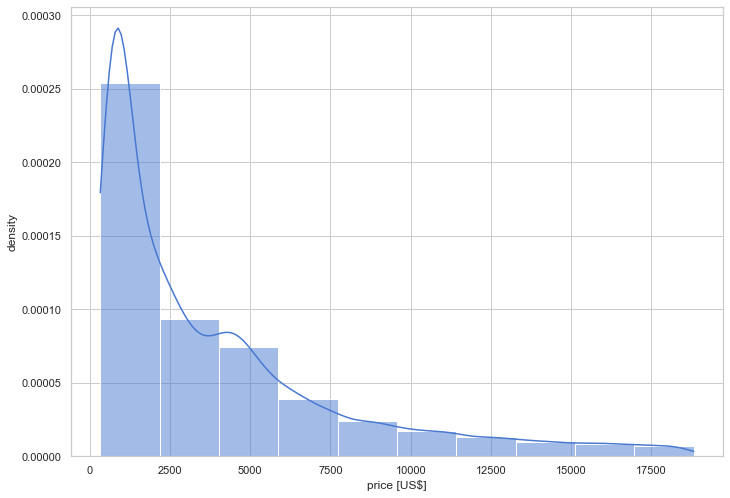

In [169]:
#Price distributions among the dataset
sns.set(style = 'whitegrid', rc={'figure.figsize':(11.7,8.27)}, palette='muted')
ax = sns.histplot(df['price'], bins=10, kde=True, stat='density')
ax.set_ylabel("density")
ax.set_xlabel("price [US$]")

<AxesSubplot:>

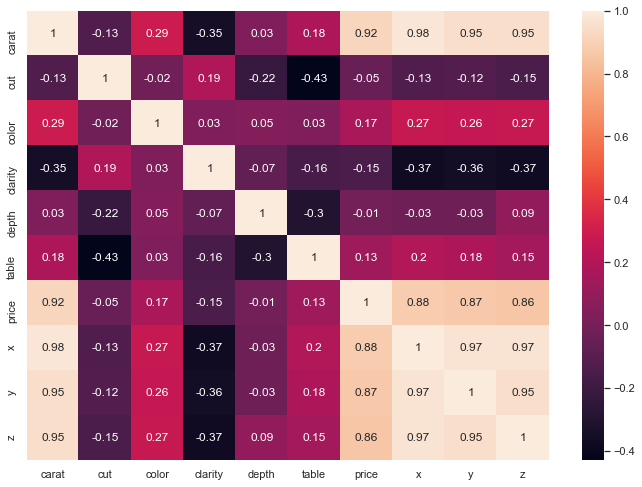

In [170]:
#Studying correlation matrix
cMat = df.corr().round(2)
sns.heatmap(data=cMat, annot=True)

From the correlation matrix we see price is poorly correlated with cut and depth, so we may drop this 2 values (?)

We also see that for pricing the diamonds carat, x, y, and z bring almost the same information. We may want to use only one of this predictors (?)

### Linear Regression
We begin by studying a linear regression model using all predictors. Since targets are not Normally distributed linear regression fails in its assumption. Therefore it can be convenient to study a transformed target such as $log(y)$, which at least makes the targets distributed more simmetrically.  
We also introduce Ridge regularization because there are some strong correlated variables, that may leed to problem in inversion of matrix $X^TX$

Text(0.5, 0, '$log(price)$ $[log(US\\$)]$')

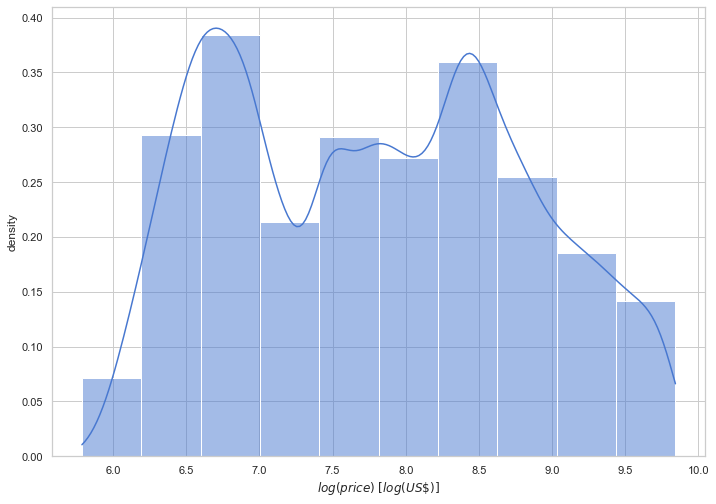

In [200]:
#Price distributions among the dataset
sns.set(style = 'whitegrid', rc={'figure.figsize':(11.7,8.27)}, palette='muted')
ax = sns.histplot(np.log(df['price']), bins=10, kde=True, stat='density')
ax.set_ylabel("density")
ax.set_xlabel(f"$log(price)$ $[log(US\$)]$")

In [201]:
#First we select predictors and targets, transforming the last
#And divide train and test data


X = df.drop('price', axis=1)
Y = np.log(df['price'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(43152, 9)
(10788, 9)
(43152,)
(10788,)


In [202]:
from sklearn.linear_model import Ridge

r = Ridge()
r.fit(X_train, Y_train)

# model evaluation for training set

y_train_predict = r.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = r.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.18986379897849037
R2 score is 0.9651368156863233


The model performance for testing set
--------------------------------------
RMSE is 0.17767811243153142
R2 score is 0.968787271826565


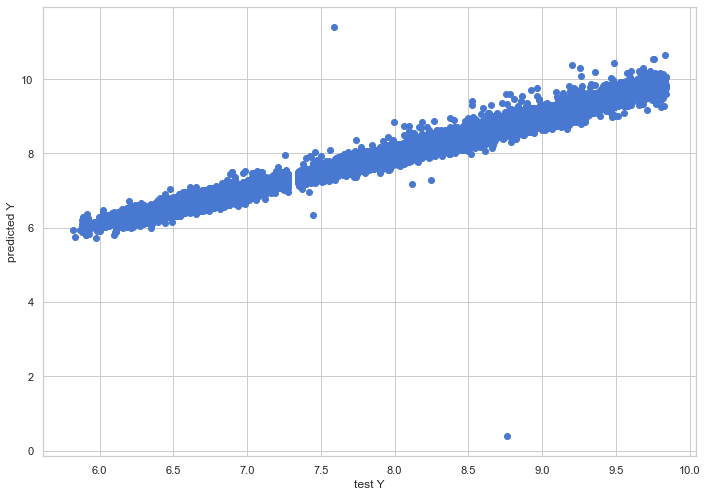

In [203]:
# plotting the y_test vs y_pred
# we want it to be the 1st quadrant bisector
plt.scatter(Y_test, y_test_predict)
plt.xlabel("test Y")
plt.ylabel("predicted Y")
plt.show()

We can see that prediction are very accurated, except for very few outliers.

We then try to improve the prediction by choosing only one of the strong correlated variables ($x, y, z, carat$) and dropping the others. We choose $carat$ because is the one with higher correlation with the target.

In [216]:
#We drop the correlated predictors and rebuild train and model data

X = df.drop(['price', 'y', 'z', 'x'], axis=1)
Y = np.log(df['price'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(43152, 6)
(10788, 6)
(43152,)
(10788,)


In [217]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

# model evaluation for training set

y_train_predict = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lr.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.35175780493448555
R2 score is 0.8803341571319013


The model performance for testing set
--------------------------------------
RMSE is 0.34967376164557706
R2 score is 0.8791101169139491


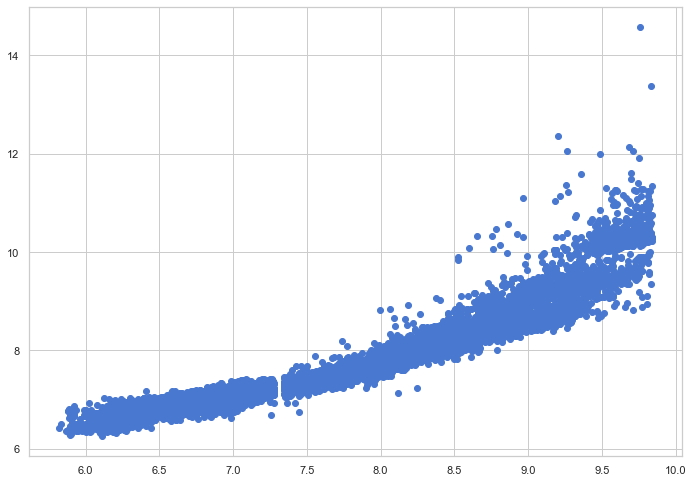

In [218]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

Both from scatterplot and accuracy values we see that decreasing the model complexity actually doesn't improve the prediction nor the variance, instead they worsen a little. Maybe the problem is the variable we have chosen between the 4 strongly correlated. Actually by dropping $x, y, z$ we have lost almost all the information about the spatial dimension of the diamond, which surely is important in defining the price (in the simplest way: _the bigger it is, the higher the price_)